In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Define a function f that represents the true (and unknown) mapping
def f(x):
    return x * 2

In [3]:
# Sample 20 values from a uniform distribution between 0 and 1
np.random.seed(42)
x = np.random.uniform(0, 1, 20)

In [4]:
x

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
       0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914])

In [5]:
# Create the targets t
t = f(x)

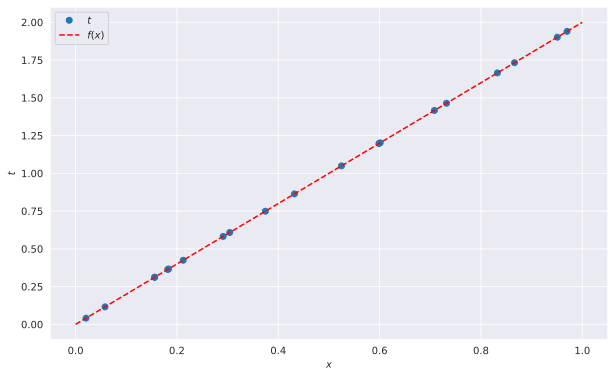

In [6]:
# Plot the target t versus the input x
plt.figure(figsize=(10,6))
plt.plot(x, t, 'o', label='$t$')
plt.plot([0, 1], [f(0), f(1)], 'r--', label='$f(x)$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.legend()
plt.show()

In [7]:
# Create the targets t with some Gaussian noises
noise = np.random.normal(0, 0.3, size=x.shape[0])
t = f(x) + noise

In [8]:
noise

array([-0.30384934,  0.0942742 , -0.27240722, -0.42369111,  0.43969463,
       -0.06773289,  0.02025846, -0.42742446, -0.16331482,  0.03327678,
       -0.34529807,  0.11270941, -0.18019161, -0.08750812, -0.18051198,
        0.55568346, -0.00404917, -0.31731328,  0.24676347, -0.36625309])

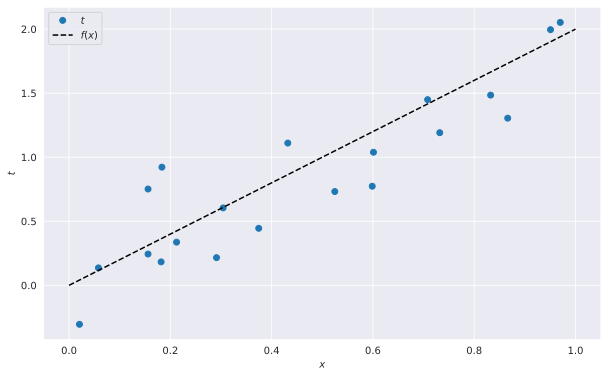

In [9]:
# Plot the target t versus the input x
plt.figure(figsize=(10,6))
plt.plot(x, t, 'o', label='$t$')
plt.plot([0, 1], [f(0), f(1)], 'k--', label='$f(x)$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.legend()
plt.show()

In [10]:
# Define our model
def model(x, theta):
    return x * theta

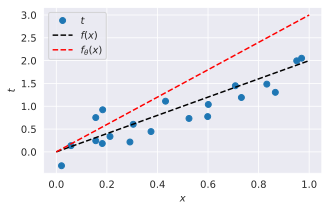

In [11]:
# Make a guess
theta = 3.0
# Plot the target t versus the input x
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.plot([0, 1], [f(0), f(1)], 'k--', label='$f(x)$')
plt.plot([0, 1], [model(0, theta), model(1, theta)], 'r--', label='$f_\\theta(x)$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.legend()
plt.show()

In [12]:
# Define the loss function
def loss(pred, t):
    return np.mean((t - pred)**2)

In [13]:
# Plot the loss versus different theta values

thetas = np.linspace(0, 4, num=1000) # weight values
loss_thetas = np.array([loss(model(x, theta), t) for theta in thetas])

In [14]:
thetas

array([0.        , 0.004004  , 0.00800801, 0.01201201, 0.01601602,
       0.02002002, 0.02402402, 0.02802803, 0.03203203, 0.03603604,
       0.04004004, 0.04404404, 0.04804805, 0.05205205, 0.05605606,
       0.06006006, 0.06406406, 0.06806807, 0.07207207, 0.07607608,
       0.08008008, 0.08408408, 0.08808809, 0.09209209, 0.0960961 ,
       0.1001001 , 0.1041041 , 0.10810811, 0.11211211, 0.11611612,
       0.12012012, 0.12412412, 0.12812813, 0.13213213, 0.13613614,
       0.14014014, 0.14414414, 0.14814815, 0.15215215, 0.15615616,
       0.16016016, 0.16416416, 0.16816817, 0.17217217, 0.17617618,
       0.18018018, 0.18418418, 0.18818819, 0.19219219, 0.1961962 ,
       0.2002002 , 0.2042042 , 0.20820821, 0.21221221, 0.21621622,
       0.22022022, 0.22422422, 0.22822823, 0.23223223, 0.23623624,
       0.24024024, 0.24424424, 0.24824825, 0.25225225, 0.25625626,
       0.26026026, 0.26426426, 0.26826827, 0.27227227, 0.27627628,
       0.28028028, 0.28428428, 0.28828829, 0.29229229, 0.29629

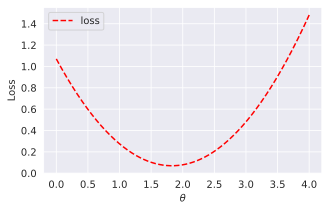

In [15]:
# Plot
plt.figure(figsize=(5,3))
plt.plot(thetas, loss_thetas, 'r--', label='loss')
plt.xlabel('$\\theta$')
plt.ylabel('Loss')
plt.legend()
plt.show()

\begin{equation}
\frac{\partial L_i}{\partial \theta}=\frac{\partial y_i}{\partial \theta}\frac{\partial L_i}{\partial y_i}
\end{equation}

\begin{equation}
\frac{\partial L_i}{\partial y_i}=\frac{\partial(t_i-y_i)^2}{\partial y_i}=-2(t_i-y_i)=2(y_i-t_i)
\end{equation}

\begin{equation}
\frac{\partial y_i}{\partial \theta}=\frac{\partial (x_i\cdot\theta)}{\partial \theta}=x_i
\end{equation}

\begin{equation}
\frac{\partial L_i}{\partial \theta}=2x_i(y_i-t_i)
\end{equation}

\begin{equation}
\frac{\partial L}{\partial \theta}=\frac{1}{N}\sum_{i=1}^N2x_i(y_i-t_i)
\end{equation}

In [16]:
# Define the gradient
def gradient(theta, x, t):
    return np.mean(2 * x * (model(x, theta) - t))

In [17]:
# Initial theta values
theta = np.random.rand()

# Set the learning rate
alpha = 0.9

# Perform gradient descent
nb_of_iterations = 4
theta_loss = [(theta, loss(model(x, theta), t))]

for i in range(nb_of_iterations):
    grad = gradient(theta, x, t)
    theta = theta - alpha * grad
    theta_loss.append((theta, loss(model(x, theta), t)))

In [18]:
# Print
for i in range(0, len(theta_loss)):
    print(f'theta({i}): {theta_loss[i][0]:.4f} \t loss: {theta_loss[i][1]:.4f}')

theta(0): 0.3117 	 loss: 0.7586
theta(1): 1.1291 	 loss: 0.2162
theta(2): 1.5060 	 loss: 0.1009
theta(3): 1.6797 	 loss: 0.0764
theta(4): 1.7598 	 loss: 0.0712


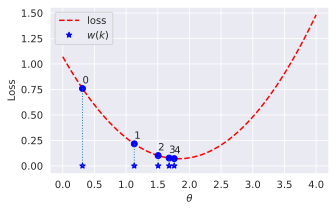

In [19]:
# Visualize the gradient descent updates
plt.figure(figsize=(5,3))
plt.plot(thetas, loss_thetas, 'r--', label='loss')

for i in range(0, len(theta_loss)-1):
    theta_1, c1 = theta_loss[i]
    theta_2, c2 = theta_loss[i+1]
    plt.plot(theta_1, c1, 'bo')
    plt.text(theta_1, c1+0.05, f'${i}$')
    plt.plot(theta_1, 0, 'b*')
    plt.vlines(x=theta_1, ymin=0, ymax=c1, lw=1, ls='dotted' )

plt.plot(theta_2, c2, 'bo' )
plt.text(theta_2, c2+0.05, f'${i+1}$')
plt.plot(theta_2, 0, 'b*', label='$w(k)$')
plt.vlines(x=theta_2, ymin=0, ymax=c2, lw=1, ls='dotted')
plt.xlabel('$\\theta$')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
# Initial theta values
theta = np.random.rand()

# Set the learning rate
alpha = 0.9

# Perform gradient descent
nb_of_iterations = 10
theta_loss = [(theta, loss(model(x, theta), t))]

for i in range(nb_of_iterations):
    grad = gradient(theta, x, t)
    theta = theta - alpha * grad
    theta_loss.append((theta, loss(model(x, theta), t)))
# Print
for i in range(0, len(theta_loss)):
    print(f'theta({i}): {theta_loss[i][0]:.4f} \t loss: {theta_loss[i][1]:.4f}')

theta(0): 0.5201 	 loss: 0.5823
theta(1): 1.2252 	 loss: 0.1788
theta(2): 1.5503 	 loss: 0.0930
theta(3): 1.7002 	 loss: 0.0747
theta(4): 1.7692 	 loss: 0.0709
theta(5): 1.8011 	 loss: 0.0700
theta(6): 1.8158 	 loss: 0.0699
theta(7): 1.8226 	 loss: 0.0698
theta(8): 1.8257 	 loss: 0.0698
theta(9): 1.8271 	 loss: 0.0698
theta(10): 1.8278 	 loss: 0.0698


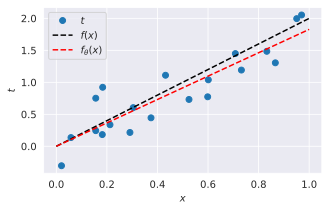

In [21]:
# Make a guess
# theta = 3.0
# Plot the target t versus the input x
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.plot([0, 1], [f(0), f(1)], 'k--', label='$f(x)$')
plt.plot([0, 1], [model(0, theta), model(1, theta)], 'r--', label='$f_\\theta(x)$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.legend()
plt.show()

# Example 2

In [22]:
# Define a function f that represents the true (and unknown) mapping
m = 3
b = 2
def f(x):
    return 3 * x + 2

In [23]:
# Sample 50 values from a uniform distribution between 0 and 1
n = 50
np.random.seed(4)
x = np.random.uniform(0, 1, n)

# Create the targets t with some Gaussian noises
noise = np.random.normal(0, 0.5, size=x.shape[0])
t = f(x) + noise

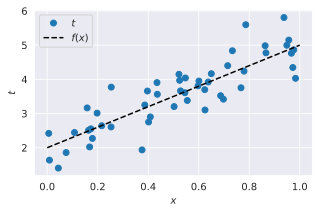

In [24]:
# Show data
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.plot([0, 1], [f(0), f(1)], 'k--', label='$f(x)$')
plt.xlabel('$x$')
plt.ylabel('$t$')
#plt.ylim(0, 6)
plt.legend()
plt.show()

In [25]:
X = np.array((np.ones_like(x), x)).T

In [26]:
X.shape

(50, 2)

In [27]:
X

array([[1.        , 0.96702984],
       [1.        , 0.54723225],
       [1.        , 0.97268436],
       [1.        , 0.71481599],
       [1.        , 0.69772882],
       [1.        , 0.2160895 ],
       [1.        , 0.97627445],
       [1.        , 0.00623026],
       [1.        , 0.25298236],
       [1.        , 0.43479153],
       [1.        , 0.77938292],
       [1.        , 0.19768507],
       [1.        , 0.86299324],
       [1.        , 0.98340068],
       [1.        , 0.16384224],
       [1.        , 0.59733394],
       [1.        , 0.0089861 ],
       [1.        , 0.38657128],
       [1.        , 0.04416006],
       [1.        , 0.95665297],
       [1.        , 0.43614665],
       [1.        , 0.94897731],
       [1.        , 0.78630599],
       [1.        , 0.8662893 ],
       [1.        , 0.17316542],
       [1.        , 0.07494859],
       [1.        , 0.60074272],
       [1.        , 0.16797218],
       [1.        , 0.73338017],
       [1.        , 0.40844386],
       [1.

In [28]:
# Define our model
def model(X, theta):
    return X @ theta

In [29]:
# Define the gradient
def gradient(theta, X, t):
    return -2 * X.T @ (t - model(X, theta))

In [30]:
# Initialize GD
np.random.seed(13)
theta = np.random.randn(2)
alpha = 0.01
losses = []
params = []

losses.append(loss(model(X, theta), t))
params.append(theta.copy())
print(f'Iter. 0:\t theta[0]={theta[0]:.4f} \t theta[1]={theta[1]:.4f} \t Loss: {losses[-1]:.4f}')
# Run GD for a number of steps
nb_iterations = 50
for i in range(nb_iterations):
    grad = gradient(theta, X, t)
    theta = theta - alpha * grad
    losses.append(loss(model(X, theta), t))
    params.append(theta.copy())
    print(f'Iter. {i+1}:\t theta[0]={theta[0]:.4f} \t theta[1]={theta[1]:.4f} \t Loss: {losses[-1]:.4f}')
# Print

Iter. 0:	 theta[0]=-0.7124 	 theta[1]=0.7538 	 Loss: 15.8329
Iter. 1:	 theta[0]=3.1777 	 theta[1]=2.9668 	 Loss: 1.5672
Iter. 2:	 theta[0]=2.0295 	 theta[1]=2.3803 	 Loss: 0.3811
Iter. 3:	 theta[0]=2.3338 	 theta[1]=2.5965 	 Loss: 0.2798
Iter. 4:	 theta[0]=2.2216 	 theta[1]=2.5786 	 Loss: 0.2687
Iter. 5:	 theta[0]=2.2309 	 theta[1]=2.6251 	 Loss: 0.2655
Iter. 6:	 theta[0]=2.2068 	 theta[1]=2.6504 	 Loss: 0.2633
Iter. 7:	 theta[0]=2.1937 	 theta[1]=2.6793 	 Loss: 0.2613
Iter. 8:	 theta[0]=2.1787 	 theta[1]=2.7048 	 Loss: 0.2596
Iter. 9:	 theta[0]=2.1654 	 theta[1]=2.7291 	 Loss: 0.2581
Iter. 10:	 theta[0]=2.1528 	 theta[1]=2.7517 	 Loss: 0.2569
Iter. 11:	 theta[0]=2.1411 	 theta[1]=2.7728 	 Loss: 0.2557
Iter. 12:	 theta[0]=2.1302 	 theta[1]=2.7926 	 Loss: 0.2547
Iter. 13:	 theta[0]=2.1199 	 theta[1]=2.8110 	 Loss: 0.2539
Iter. 14:	 theta[0]=2.1103 	 theta[1]=2.8283 	 Loss: 0.2531
Iter. 15:	 theta[0]=2.1014 	 theta[1]=2.8444 	 Loss: 0.2525
Iter. 16:	 theta[0]=2.0930 	 theta[1]=2.8595 	 L

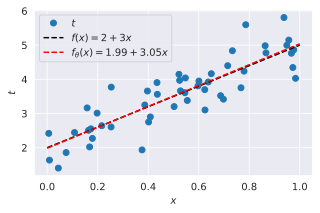

In [31]:
# Plot the target t versus the input x
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.plot([0, 1], [f(0), f(1)], 'k--', label='$f(x)=2 + 3x$')
plt.plot([0, 1], [model([[1, 0]], theta), model([[1, 1]], theta)], 'r--', label=f'$f_\\theta(x)={theta[0]:.2f} + {theta[1]:.2f}x$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.legend()
plt.show()

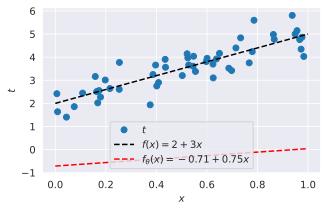

In [32]:
# Plot the target t versus the input x
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.plot([0, 1], [f(0), f(1)], 'k--', label='$f(x)=2 + 3x$')
plt.plot([0, 1], [model([[1, 0]], params[0]), model([[1, 1]], params[0])], 'r--', label=f'$f_\\theta(x)={params[0][0]:.2f} + {params[0][1]:.2f}x$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.legend()
plt.show()

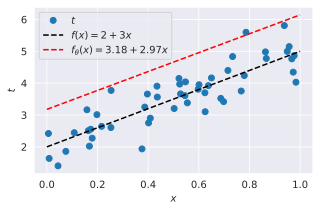

In [33]:
# Plot the target t versus the input x
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.plot([0, 1], [f(0), f(1)], 'k--', label='$f(x)=2 + 3x$')
plt.plot([0, 1], [model([[1, 0]], params[1]), model([[1, 1]], params[1])], 'r--', label=f'$f_\\theta(x)={params[1][0]:.2f} + {params[1][1]:.2f}x$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.legend()
plt.show()

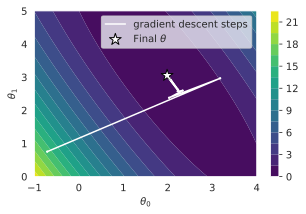

In [34]:
# Show loss surface
nb_of_ws = 50
wsa = np.linspace(-1, 4, num=nb_of_ws) # theta_0
wsb = np.linspace(0, 5, num=nb_of_ws) # theta_1
ws_x, ws_y = np.meshgrid(wsa, wsb)
loss_ws = np.zeros((nb_of_ws, nb_of_ws))

for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        weights = np.asarray([ws_x[i,j], ws_y[i,j]])
        loss_ws[i, j] = loss(model(X, weights), t)

# plot the loss function surface
plt.figure(figsize=(5,3))
cont = plt.contourf(ws_x, ws_y, loss_ws, 20, cmap=cm.viridis)

# plot gradient descent
params_arr = np.vstack(params)
plt.scatter(params_arr[:,0], params_arr[:,1], color='w', s=2)
plt.plot(params_arr[:,0], params_arr[:,1], 'w-', label='gradient descent steps')
plt.scatter([params_arr[-1,0]],[params_arr[-1,1]], color='w', marker='*', s=150, edgecolor='black', label='Final $\\theta$')
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')

cbar = plt.colorbar(cont)
plt.legend()
plt.show()

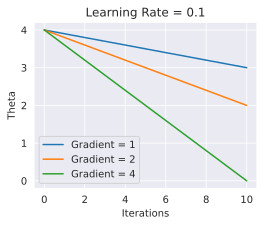

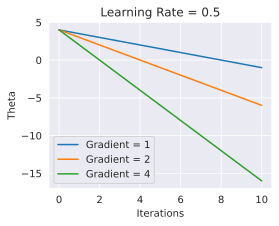

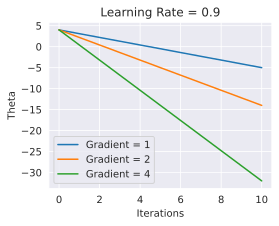

In [36]:
import matplotlib.pyplot as plt

theta = 4
num_iterations = 10

# Danh sách tốc độ học và gradient
learning_rates = [0.1, 0.5, 0.9]
gradients = [1, 2, 4]

for alpha in learning_rates:
    plt.figure(figsize=(4, 3))
    plt.title(f'Learning Rate = {alpha}')
    for grad in gradients:
        theta = 4  # Khởi tạo lại giá trị theta ban đầu
        theta_list = [theta]
        for i in range(num_iterations):
            gradient = grad  # Sử dụng gradient khác nhau
            theta = theta - alpha * gradient
            theta_list.append(theta)
        plt.plot(range(num_iterations + 1), theta_list, label=f'Gradient = {grad}')
    plt.xlabel('Iterations')
    plt.ylabel('Theta')
    plt.legend()
    plt.show()
